<a href="https://colab.research.google.com/github/Deepak5j/StockPrediction/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=8a00502cf066444aafd94ad73612236ed36b799a417ddb5309c49fedabaa2911
  Stored in directory: /tmp/pip-ephem-wheel-cache-q8bpix7b/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [3]:
## saving file to gdrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#reading data from yfinance
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
df_full = pdr.get_data_yahoo("JPM", start="2018-01-01").reset_index()
df_full.to_csv('JPM.csv', index=False)
df_full.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,107.629997,108.019997,106.809998,107.949997,103.156837,13578800
1,2018-01-03,107.860001,108.489998,107.480003,108.059998,103.261963,11901000
2,2018-01-04,108.360001,110.029999,108.199997,109.040001,104.741249,12953700
3,2018-01-05,109.260002,109.550003,107.779999,108.339996,104.068840,14155000
4,2018-01-08,108.150002,108.680000,107.699997,108.500000,104.222534,12466500


In [0]:
#saving data to csv file
df_full = pd.read_csv('JPM.csv')

# Agents

### Not learing agent. Agents with *pre-defined* threshold value
    Turtle Trading agent
    Moving Average agent
    Signal Rolling agent



### Pure reinforcement learning
    Policy Gradient agent
    Q-learning agent



### Evolutionary stategies
    Evolution Strategy agent



### Deep reinforcement learning    
    Double Q-learning agent
    Recurrent Q-learning agent
    Double Recurrent Q-learning agent
    Duel Q-learning agent
    Double Duel Q-learning agent
    Duel Recurrent Q-learning agent
    Double Duel Recurrent Q-learning agent
    Actor-critic agent
    Actor-critic Duel agent
    Actor-critic Recurrent agent
    Actor-critic Duel Recurrent agent
    Curiosity Q-learning agent
    Recurrent Curiosity Q-learning agent
    Duel Curiosity Q-learning agent
    Neuro-evolution agent
    Neuro-evolution with Novelty search agent
    ABCD strategy agent
    Deep Evolution Strategy


In [6]:
#Turtle Trading Agent
df = df_full.copy()
name = 'Turtle Trading Agent'
count = int(np.ceil(len(df) * 0.1))
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['trend'] = df['Close']
signals['RollingMax'] = (signals.trend.shift(1).rolling(count).max())
signals['RollingMin'] = (signals.trend.shift(1).rolling(count).min())
signals.loc[signals['RollingMax'] < signals.trend, 'signal'] = -1
signals.loc[signals['RollingMin'] > signals.trend, 'signal'] = 1
signals

,signal,trend,RollingMax,RollingMin
0,0.0,107.949997,NaN,NaN
1,0.0,108.059998,NaN,NaN
2,0.0,109.040001,NaN,NaN
3,0.0,108.339996,NaN,NaN
4,0.0,108.500000,NaN,NaN
5,0.0,109.050003,NaN,NaN
6,0.0,110.250000,NaN,NaN
7,0.0,110.839996,NaN,NaN
8,0.0,112.669998,NaN,NaN
9,0.0,112.269997,NaN,NaN


In [0]:
#Turtle Trading Algorithm
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i] #share I have
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1: #1 day
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    #apply stretegy in above line. eg instead of 100 use 50
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [8]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['signal'])

day 56: buy 1 units at price 107.010002, total balance 9892.989998
day 101: buy 1 units at price 105.930000, total balance 9787.059998
day 119: buy 1 units at price 105.750000, total balance 9681.309998
day 120: buy 1 units at price 104.790001, total balance 9576.519997
day 122: buy 1 units at price 103.239998, total balance 9473.279999
day 139, sell 1 units at price 113.349998, investment 9.792716 %, total balance 9586.629997,
day 140, sell 1 units at price 114.150002, investment 10.567614 %, total balance 9700.779999,
day 141, sell 1 units at price 115.180000, investment 11.565287 %, total balance 9815.959999,
day 143, sell 1 units at price 116.029999, investment 12.388610 %, total balance 9931.989998,
day 144, sell 1 units at price 116.730003, investment 13.066646 %, total balance 10048.720001,
day 148: cannot sell anything, inventory 0
day 149: cannot sell anything, inventory 0
day 150: cannot sell anything, inventory 0
day 151: cannot sell anything, inventory 0
day 181: cannot sel

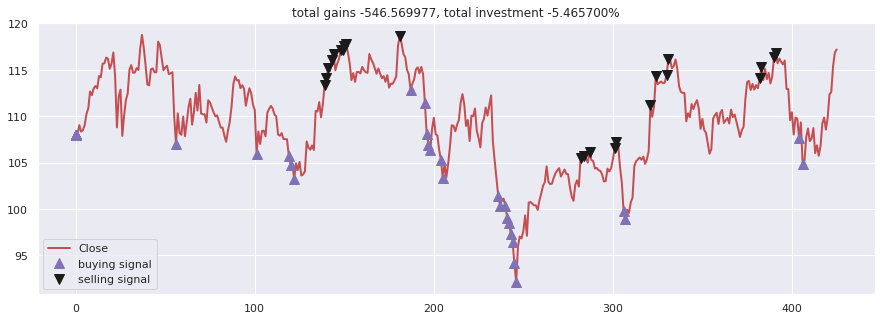

In [9]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.savefig(name+'.png')
plt.show()